<a href="https://colab.research.google.com/github/Azeem4567/Final_Project_Image_Classification_Cifar10/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Libraries

In [ ]:
# Import necessary libraries for deep learning, data augmentation, and visualization
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2  # OpenCV for resizing images
import matplotlib.pyplot as plt
import numpy as np

# Load and Preprocess Data

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images to a range of 0 to 1 for faster and more stable training
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoded format for multi-class classification
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Data Augmentation Setup

In [ ]:
target_size = (64, 64) # target size for resizing (e.g., 64x64 or 128x128 for display and training)
# Function to resize images in the dataset
def resize_images(images, size):
    resized_images = np.array([cv2.resize(img, size) for img in images])
    return resized_images

# Resize train and test images
resized_train_images = resize_images(train_images, target_size)
resized_test_images = resize_images(test_images, target_size)

# Set up data augmentation generator with various transformations
augmentation = ImageDataGenerator(
    rotation_range=10,          # Random rotation up to 20 degrees
    width_shift_range=0.15,     # Horizontal shift by up to 15% of the width
    height_shift_range=0.15,    # Vertical shift by up to 15% of the height
    horizontal_flip=True,       # Randomly flip images horizontally
)
augmentation.fit(resized_train_images)  # Apply augmentation transformations to the training set

# Visualize Augmented Images

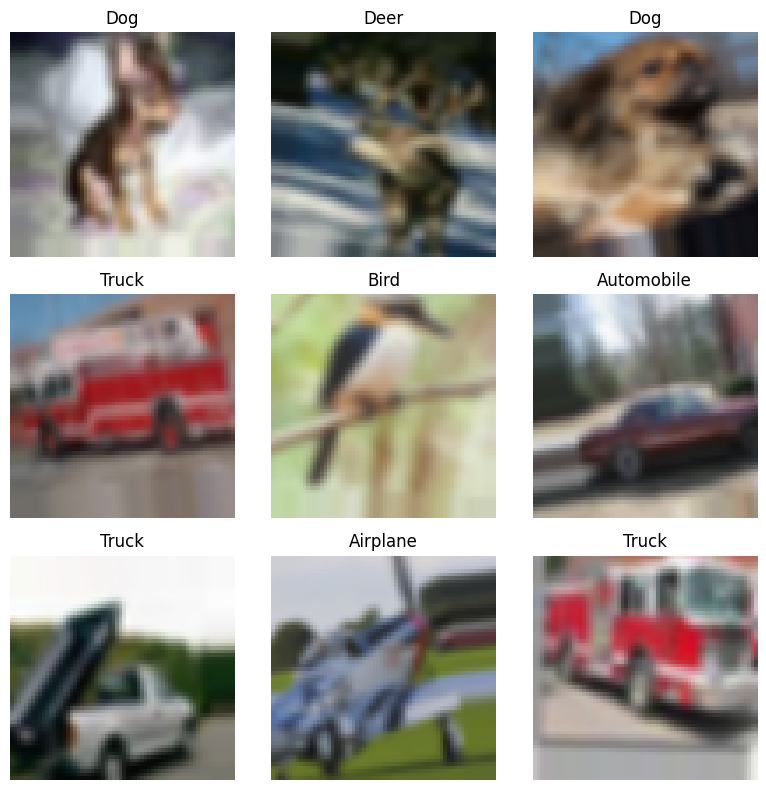

In [ ]:
# Display augmented images
# CIFAR-10 class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Display a 3x3 grid of augmented images with class names
plt.figure(figsize=(8, 8))
for batch_images, batch_labels in augmentation.flow(resized_train_images, train_labels, batch_size=9):
    for i in range(9):  # Display the first 9 images in the batch
        plt.subplot(3, 3, i + 1)
        plt.imshow(batch_images[i], interpolation='nearest')
        plt.axis('off')

        # Get the class label for each image
        label_index = np.argmax(batch_labels[i])  # Convert one-hot encoded label to index
        plt.title(class_names[label_index])       # Set the title as the class name

    plt.tight_layout()
    plt.show()
    break  # Display only one batch and exit



# Define the CNN Model

In [ ]:
# Define a custom CNN model
model = Sequential([
    Input(shape=(target_size[0], target_size[1], 3)),                         # Input layer with specified shape
    Conv2D(32, (3, 3), activation='relu'),            # First convolutional layer
    MaxPooling2D((2, 2)),                             # First pooling layer
    Dropout(0.2),                                     # Dropout layer for regularization

    Conv2D(64, (3, 3), activation='relu'),            # Second convolutional layer
    MaxPooling2D((2, 2)),                             # Second pooling layer
    Dropout(0.3),                                     # Dropout layer

    Conv2D(128, (3, 3), activation='relu'),           # Third convolutional layer
    Flatten(),                                        # Flatten layer to convert 3D to 1D for dense layers

    Dense(128, activation='relu'),                    # Fully connected layer
    Dropout(0.4),                                     # Dropout layer for regularization
    Dense(10, activation='softmax')                   # Output layer with 10 units for CIFAR-10 classes
])



# compiling the Model

In [ ]:
# Compile the model with an optimizer, loss function, and metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary

In [ ]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,453,962 (9.36 MB)

 Trainable params: 2,453,962 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(resized_train_images.shape)  # Should match the input shape (e.g., (50000, 64, 64, 3))
print(resized_test_images.shape)
print(type(resized_train_images), type(resized_test_images))
print(train_labels.shape, test_labels.shape)  # Should be (50000, 10) for CIFAR-10

(50000, 64, 64, 3)
(10000, 64, 64, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(50000, 10) (10000, 10)


# Train the Model with Data Augmentation

In [ ]:
# Train the model using augmented data
validation_steps = len(resized_test_images) // 64
history = model.fit(
    augmentation.flow(resized_train_images, train_labels, batch_size=64),
    epochs=20,
    validation_data=(resized_test_images, test_labels),
    validation_steps=validation_steps
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.2512 - loss: 2.0211

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 108ms/step - accuracy: 0.2515 - loss: 2.0203 - val_accuracy: 0.4529 - val_loss: 1.5350
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 100ms/step - accuracy: 0.4087 - loss: 1.6196 - val_accuracy: 0.5265 - val_loss: 1.3508
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.4629 - loss: 1.4823 - val_accuracy: 0.5787 - val_loss: 1.1890
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.5038 - loss: 1.3838 - val_accuracy: 0.6109 - val_loss: 1.1013
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.5256 - loss: 1.3115 - val_accuracy: 0.6307 - val_loss: 1.0435
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.5431 - loss: 1.2763 - val_accuracy: 0.6466 - val_loss: 1.0061
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.5620 - loss: 1.2365 - val_accuracy: 0.6567 - val_loss: 0.9578
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.5640 - loss: 1.2247 - val

# Visualize Training and Validation Performance

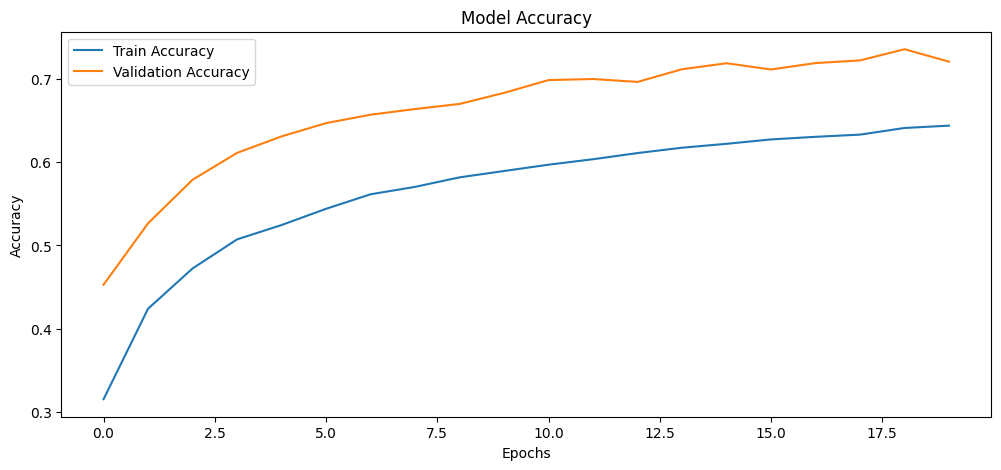

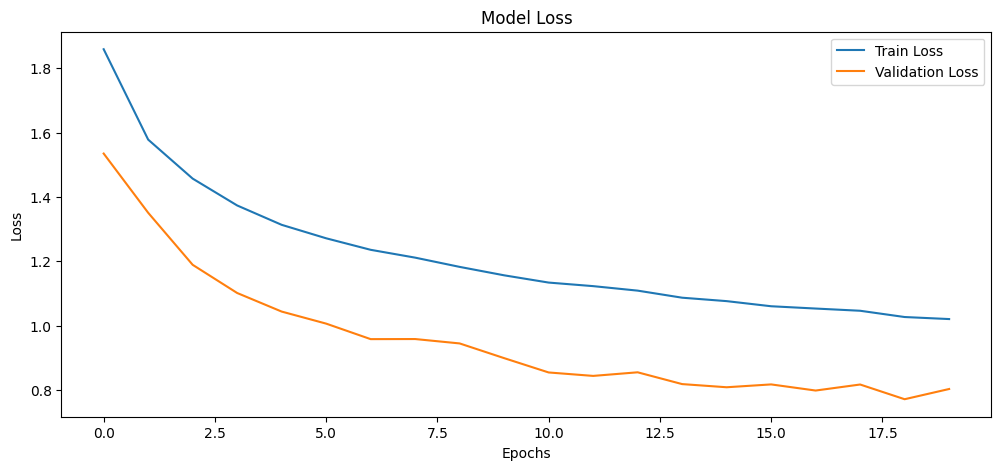

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
